In [2]:
!pip install pandas
!pip install matplotlib
!pip install numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import pandas as pd
import math

In [28]:
nOfPoints = 500 #amount of points S /n
fraction = 0.0 #outlier fraction f, those are the dots that don't belong. Default is 0)
codes = [Path.MOVETO] + [Path.LINETO]*2 + [Path.CLOSEPOLY]
vertices = [(3, 3), (7, 3), (7, 7), (0, 0)] #T, the triangle
path = Path(vertices, codes)
areaOfCircles = 20

In [23]:
def change_color(xCoordinates, yCoordinates, fraction=0):
    colors = ["red" for x in xCoordinates]
    probability = np.random.rand(len(xCoordinates))
    for p in range(len(xCoordinates)):
        if path.contains_points([(xCoordinates[p], yCoordinates[p])])[0]:
            colors[p] = "blue"
        if probability[p] < fraction:
            if colors[p] == "red":
                colors[p] = "blue"
            else:
                colors[p] = "red"
    return colors

In [22]:
def generate_points(nOfPoints):
    xCoordinates = np.random.rand(nOfPoints) * 10
    yCoordinates = np.random.rand(nOfPoints) * 10
    colors = change_color(xCoordinates, yCoordinates, fraction)
    df = pd.DataFrame({"x":xCoordinates, "y":yCoordinates, "color":colors}, columns=["x","y","color"])
    return df

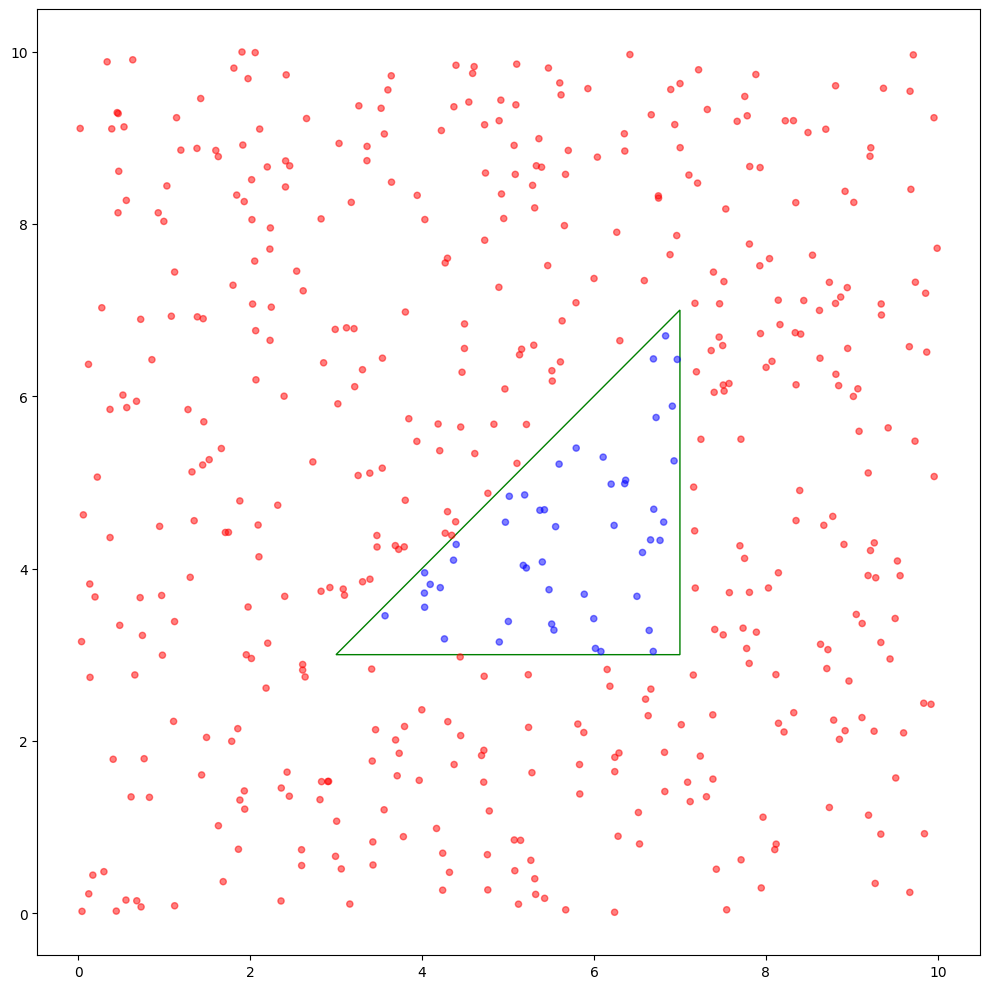

In [27]:
df = generate_points(nOfPoints)
fig, axs = plt.subplots(1, 1,figsize=(10, 10),tight_layout=True) #Size of the figure 10x10 aka Q
pathpatch = PathPatch(path, facecolor='none', edgecolor='green')
axs.add_patch(pathpatch)
plt.scatter(df["x"], df["y"], s=areaOfCircles, c=df["color"], alpha=0.5)
axs.autoscale_view()
plt.show()

In [36]:
def find_KNN(df, point, k):
    df['dist'] = np.sqrt((df['x'].to_numpy() - point['x'])**2 + (df['y'].to_numpy() - point['y'])**2)
    df.sort_values('dist', ignore_index=True, inplace=True)
    return df[:k]

In [37]:
point = pd.DataFrame([[6,6]],columns=['x','y'])
print(find_KNN(df,point.iloc[0],4)['color'].mode()[0])

red


In [31]:
testPoints = generate_points(1000)
nOfTrueColors = 0
for index, row in testPoints.iterrows():
    knnColor = find_KNN(df, row, 4)['color'].mode()[0]
    if knnColor == row['color']:
        nOfTrueColors += 1
print(nOfTrueColors/1000)

0.983


In [38]:
# results = []
# for i in range(20):
#     accuracy = find_the_accuracy
# results.append(accuracy)

NameError: name 'find_the_accuracy' is not defined